In [9]:
import numpy as np
import pandas as pd
from utils import *
from QuantificationScripts.NucleationAndPropagationMeasurements import *


kwargs = dict()
kwargs['distance_metric'] = 'kl_divergence'
kwargs['visualize_flag'] = False
kwargs['only_recent_death_flag_for_neighbors_calc'] = True
dir_path = os.sep.join(
        os.getcwd().split(os.sep) + ['Data', 'Experiments_XYT_CSV',
                                          'OriginalTimeMinutesData'])

In [10]:
# by_treatment_distance_metric_score_p_nuc, by_treatment_distance_metric_score_p_prop = calc_distance_metric_between_experiments_results_of_altering_flag_values(dir_path=dir_path, **kwargs)
all_global_p_nuc, all_global_p_prop, all_treatment_types = calc_and_visualize_all_experiments_csvs_in_dir(dir_path=dir_path, **kwargs)

analyzing exp 20160820_10A_FB_xy11 | 1/94
analyzing exp 20160820_10A_FB_xy12 | 2/94
analyzing exp 20160820_10A_FB_xy13 | 3/94
analyzing exp 20160820_10A_FB_xy14 | 4/94
analyzing exp 20160820_10A_FB_xy15 | 5/94
analyzing exp 20160828_10AsgCx43_FB_xy01 | 6/94
analyzing exp 20160828_10AsgCx43_FB_xy02 | 7/94
analyzing exp 20160828_10AsgCx43_FB_xy03 | 8/94
analyzing exp 20160828_10AsgCx43_FB_xy04 | 9/94
analyzing exp 20160828_10AsgCx43_FB_xy05 | 10/94
analyzing exp 20160828_10AsgCx43_FB_xy06 | 11/94
analyzing exp 20160828_10AsgCx43_FB_xy07 | 12/94
analyzing exp 20160828_10AsgCx43_FB_xy08 | 13/94
analyzing exp 20160828_10AsgCx43_FB_xy09 | 14/94
analyzing exp 20160828_10AsgCx43_FB_xy10 | 15/94
analyzing exp 20160828_10AsgCx43_FB_xy11 | 16/94
analyzing exp 20160828_10AsgCx43_FB_xy13 | 17/94
analyzing exp 20160828_10Awt_FB_xy01 | 18/94
analyzing exp 20160828_10Awt_FB_xy02 | 19/94
analyzing exp 20160828_10Awt_FB_xy03 | 20/94
analyzing exp 20160828_10Awt_FB_xy04 | 21/94
analyzing exp 20160828_10A

In [11]:
treatment_p_nuc_prop = {}
p_nuc_p_prop = []
treatments_names = []
for exp_pnuc, exp_pprop, treatment in zip(all_global_p_nuc,
                                           all_global_p_prop,
                                           all_treatment_types):
    treatment_p_nuc_prop[treatment] = treatment_p_nuc_prop.get(treatment, []) + [(exp_pnuc, exp_pprop)]
    p_nuc_p_prop.append([exp_pnuc, exp_pprop])
    treatments_names.append(treatment)

In [12]:
mean_distance_by_treatment = {}
for treatment_name, treatment_probas in treatment_p_nuc_prop.items():
    treatment_probas = np.array(treatment_probas)
    treatment_centroid = np.mean(treatment_probas, axis=0)
    treatment_distance = 0
    for exp_probas in treatment_probas:
        treatment_distance += np.sqrt((treatment_centroid[0]**2+exp_probas[0]**2)+
                                      (treatment_centroid[1]**2+exp_probas[1]**2))

    mean_distance_by_treatment[treatment_name] = treatment_distance/len(treatment_probas)

In [6]:
all_death_mean_distance_by_treatment = mean_distance_by_treatment

In [13]:
# for recent death only
recent_death_mean_distance_by_treatment = mean_distance_by_treatment

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


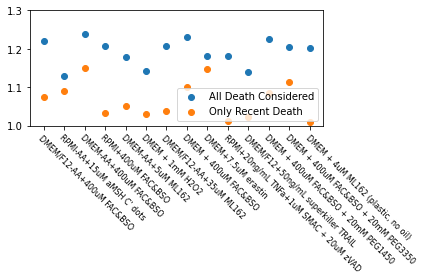

In [16]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0, len(all_death_mean_distance_by_treatment), 1), all_death_mean_distance_by_treatment.values(), label='All Death Considered')
ax.scatter(np.arange(0, len(recent_death_mean_distance_by_treatment), 1), recent_death_mean_distance_by_treatment.values(), label='Only Recent Death')
ax.set_xticks(np.arange(0, len(all_death_mean_distance_by_treatment), 1))
ax.set_xticklabels(all_death_mean_distance_by_treatment )
ax.tick_params(axis='x', labelrotation=-45, labelsize=kwargs.get('x_tick_label_size', 8))

ax.set_ylim((1, 1.3))
ax.legend(facecolor=(1, 1, 1, 0.3))
plt.setp(ax.xaxis.get_majorticklabels(), ha="left", rotation_mode="anchor")
plt.tight_layout()
plt.savefig('test.png', dpi=200)
plt.savefig('test.eps', dpi=200)
plt.show()

In [18]:
len(np.arange(0, len(mean_distance_by_treatment), 1),)

14

In [3]:
dict_1 = {'key1': 1, 'key2': 3}
dict_2 = {'key1': 3, 'key3': 4}
dict_1.update(dict_2)
print(dict_1)

{'key1': 3, 'key2': 3, 'key3': 4}


In [10]:
from utils import *

kwargs_to_add = {'ferroptosis_attempt_HIGH_healing_factor': [0, 1, 0, 1]}
add_values_to_json('C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\config_files\\treatment_to_color_dict_path.txt', kwargs_to_add)
kwargs_to_add = {'ferroptosis_attempt_HIGH_healing_factor': '$H$'}
add_values_to_json('C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\config_files\\treatment_to_marker_dict_path.txt', kwargs_to_add)

In [11]:
import os
import pandas as pd

meta_data_df = pd.read_csv('C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\Data\\Experiments_XYT_CSV\\ExperimentsMetaData.csv')
meta_data_df['Density(#Cells)'] = 0
for row_idx, row in meta_data_df.iterrows():
    filename = row['File Name']
    filepath = os.sep.join(['C:\\Users\\User\\PycharmProjects\\CellDeathQuantification\\Data\\Experiments_XYT_CSV\\OriginalTimeMinutesData', filename])
    file_df = pd.read_csv(filepath)
    number_of_cells = len(file_df)
    meta_data_df.iloc[row_idx, 'Density(#Cells)'] = number_of_cells

meta_data_df.to_csv()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

87.0